## Forward Propagation

In [1]:
from Concat import Concat
from ConvolutionalLayer import ConvolutionalLayer
from MaxPoolLayer import MaxPoolLayer
from UpconvolutionLayer import UpconvolutionalLayer
from UpsamplingLayer import UpsamplingLayer
from SquaredError import SquaredError
from halfLayers import halfLayers
import numpy as np
import os

### Get training data

In [2]:
unlensed = []
# Directory containing the .npy files
directory = r"lensingData/Data/train/Lensed"

# Get a list of .npy files in the directory
npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')][:20]

# Sort the files to maintain order
npy_files.sort()

print(npy_files[:5])
# Iterate through the list and plot each file
for idx, npy_file in enumerate(npy_files):
    # Load the .npy file
    data = np.load(os.path.join(directory, npy_file))
    unlensed.append(data)

unlensed = np.array(unlensed)


['10019_1.1988096538977375.npy', '10019_1.274228701026851.npy', '10019_1.8988371845614558.npy', '10019_2.1590693782000945.npy', '10019_2.223947000861411.npy']


### Get testing data

In [3]:
lensed = []
# Directory containing the .npy files
directory = r"lensingData/Data/train/Unlensed"

# Get a list of .npy files in the directory
npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')][:20]

# Sort the files to maintain order
npy_files.sort()

print(npy_files[:5])
# Iterate through the list and plot each file
for idx, npy_file in enumerate(npy_files):
    # Load the .npy file
    data = np.load(os.path.join(directory, npy_file))
    lensed.append(data)

lensed = np.array(lensed)

['10019_1.1988096538977375.npy', '10019_1.274228701026851.npy', '10019_1.8988371845614558.npy', '10019_2.1590693782000945.npy', '10019_2.223947000861411.npy']


In [4]:
Down_conv_1 = ConvolutionalLayer(kwidth=2, kcount=2)
Max_pool_1 = MaxPoolLayer(2, 2)
Down_conv_2 = ConvolutionalLayer(kwidth=2, kcount=2)
Max_pool_2 = MaxPoolLayer(2, 2)
Down_conv_3 = ConvolutionalLayer(kwidth=2, kcount=2)
Max_pool_3 = MaxPoolLayer(2, 2)
Down_conv_4 = ConvolutionalLayer(kwidth=2, kcount=2)
Up_sample_1 = UpsamplingLayer(2)
Half_1 = halfLayers()
Concat_1 = Concat(Down_conv_3)
Half_2 = halfLayers()
Up_conv_1 = UpconvolutionalLayer(3, 1)
Up_sample_2 = UpsamplingLayer(2)
Half_3 = halfLayers()
Concat_2 = Concat(Down_conv_2)
Half_4 = halfLayers()
Up_conv_2 = UpconvolutionalLayer(3, 1)
Up_sample_3 = UpsamplingLayer(2)
Half_5 = halfLayers()
Concat_3 = Concat(Down_conv_1)
Up_conv_3 = UpconvolutionalLayer(3, 1)
Half_6 = halfLayers()
Half_7 = halfLayers()
Up_conv_4 = UpconvolutionalLayer(3, 1)
Squared_Error = SquaredError()

In [5]:
first_image = np.array([unlensed[0]])
forward_down_conv_1 = Down_conv_1.forward(first_image)
first_image.shape, forward_down_conv_1.shape

((1, 64, 64), (2, 63, 63))

### Plotting the original image

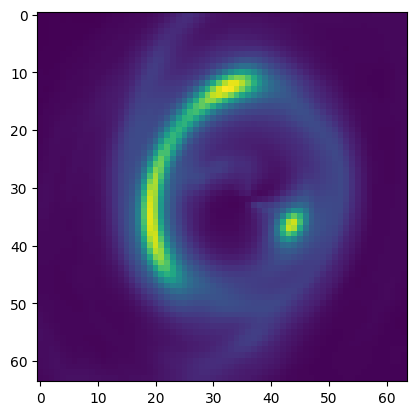

In [6]:
import matplotlib.pyplot as plt
plt.imshow(first_image[0], cmap='viridis')

In [7]:
forward_max_pool_1 = Max_pool_1.forward(forward_down_conv_1)
forward_down_conv_2 = Down_conv_2.forward(forward_max_pool_1)
forward_max_pool_1.shape, forward_down_conv_2.shape

((2, 31, 31), (4, 30, 30))

In [8]:
forward_max_pool_2 = Max_pool_2.forward(forward_down_conv_2)
forward_down_conv_3 = Down_conv_3.forward(forward_max_pool_2)
forward_max_pool_2.shape, forward_down_conv_3.shape

((4, 15, 15), (8, 14, 14))

In [9]:
forward_max_pool_3 = Max_pool_3.forward(forward_down_conv_3)
forward_max_pool_3.shape

(8, 7, 7)

In [10]:
forward_down_conv_4 = Down_conv_4.forward(forward_max_pool_3)
forward_down_conv_4.shape

(16, 6, 6)

In [11]:
forward_up_sample_1 = Up_sample_1.forward(forward_down_conv_4)
forward_half_layer_1 = Half_1.forward(forward_up_sample_1)
forward_half_layer_1.shape

(8, 12, 12)

In [12]:
forward_concat_1 = Concat_1.forward(forward_half_layer_1)
forward_half_layer_2 = Half_2.forward(forward_concat_1)
forward_half_layer_2.shape, forward_concat_1.shape

((8, 12, 12), (16, 12, 12))

In [13]:
forward_up_conv_1 = Up_conv_1.forward(forward_half_layer_2)
forward_up_conv_1.shape

(8, 14, 14)

In [14]:
forward_up_sample_2 = Up_sample_2.forward(forward_up_conv_1)
forward_half_layer_3 = Half_3.forward(forward_up_sample_2)
forward_half_layer_3.shape

(4, 28, 28)

In [15]:
forward_concat_2 = Concat_2.forward(forward_half_layer_3)
forward_half_layer_4 = Half_4.forward(forward_concat_2)
forward_half_layer_4.shape

(4, 28, 28)

In [16]:
forward_up_conv_2 = Up_conv_2.forward(forward_half_layer_4)
forward_up_conv_2.shape

(4, 30, 30)

In [17]:
forward_up_sample_3 = Up_sample_3.forward(forward_up_conv_2)
forward_half_layer_5 = Half_5.forward(forward_up_sample_3)
forward_half_layer_5.shape

(2, 60, 60)

In [18]:
forward_concat_3 = Concat_3.forward(forward_half_layer_5)
forward_half_layer_6 = Half_6.forward(forward_concat_3)
forward_half_layer_6.shape

(2, 60, 60)

In [19]:
forward_up_conv_3 = Up_conv_3.forward(forward_half_layer_6)
forward_half_layer_7 = Half_7.forward(forward_up_conv_3)
forward_half_layer_7.shape

(1, 62, 62)

In [20]:
forward_up_conv_4 = Up_conv_4.forward(forward_half_layer_7)
forward_up_conv_4.shape

(1, 64, 64)

### Plotting predicted image

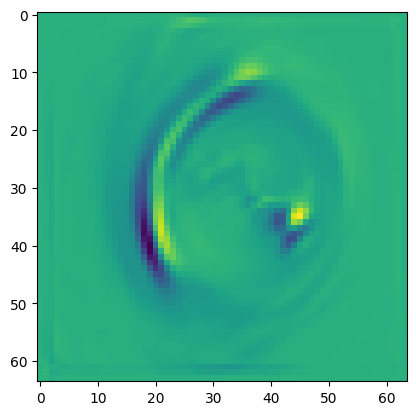

In [21]:
plt.imshow(forward_up_conv_4[0], cmap='viridis')

In [22]:
flattened_data = forward_up_conv_4.flatten()
flattened_data.shape

(4096,)

In [23]:
Y = lensed[0].flatten()

In [24]:
gradient = Squared_Error.gradient(Y, flattened_data)
gradient = gradient.reshape((1, 64, 64))
gradient.shape

(1, 64, 64)

## Backward propagation

In [25]:
backward_up_conv_4 = Up_conv_4.backward(gradient)
Up_conv_4.updateWeights(gradient, 0.01)
backward_up_conv_4.shape

64 62


(1, 62, 62)

In [26]:
backward_half_layer_7 = Half_7.backward(backward_up_conv_4)
backward_half_layer_7.shape

(2, 62, 62)

In [27]:
backward_up_conv_3 = Up_conv_3.backward(backward_half_layer_7)
Up_conv_3.updateWeights(backward_half_layer_7, 0.01)
backward_up_conv_3.shape

62 60
62 60


(2, 60, 60)

In [28]:
backward_half_layer_6 = Half_6.backward(backward_up_conv_3)
backward_concat_3 = Concat_3.backward(backward_half_layer_6)
backward_half_layer_6.shape, backward_concat_3.shape

((4, 60, 60), (2, 60, 60))

In [29]:
backward_half_layer_5 = Half_5.backward(backward_concat_3)
backward_up_sample_3 = Up_sample_3.backward(backward_half_layer_5)

backward_half_layer_5.shape, backward_up_sample_3.shape

((4, 60, 60), (4, 30, 30))

In [30]:
backward_up_conv_2 = Up_conv_2.backward(backward_up_sample_3)
Up_conv_2.updateWeights(backward_up_sample_3, 0.01)
backward_up_conv_2.shape

30 28
30 28
30 28
30 28


(4, 28, 28)

In [31]:
backward_half_layer_4 = Half_4.backward(backward_up_conv_2)
backward_concat_2 = Concat_2.backward(backward_half_layer_4)

backward_half_layer_4.shape, backward_concat_2.shape

((8, 28, 28), (4, 28, 28))

In [32]:
backward_half_layer_3 = Half_3.backward(backward_concat_2)
backward_up_sample_2 = Up_sample_2.backward(backward_half_layer_3)

backward_up_sample_2.shape, backward_half_layer_3.shape

((8, 14, 14), (8, 28, 28))

In [33]:
backward_up_conv_1 = Up_conv_1.backward(backward_up_sample_2)
Up_conv_1.updateWeights(backward_up_sample_2, 0.01)
backward_up_conv_1.shape

14 12
14 12
14 12
14 12
14 12
14 12
14 12
14 12


(8, 12, 12)

In [34]:
backward_half_layer_2 = Half_2.backward(backward_up_conv_1)
backward_concat_1 = Concat_1.backward(backward_half_layer_2)
backward_half_layer_2.shape, backward_concat_1.shape

((16, 12, 12), (8, 12, 12))

In [35]:
backward_half_layer_1 = Half_1.backward(backward_concat_1)
backward_up_sample_1 = Up_sample_1.backward(backward_half_layer_1)
backward_up_sample_1.shape, backward_half_layer_1.shape

((16, 6, 6), (16, 12, 12))

In [36]:
backward_down_conv_4 = Down_conv_4.backward(backward_up_sample_1)
Down_conv_4.updateWeights(backward_up_sample_1, 0.01)
backward_down_conv_4.shape

(8, 7, 7)

In [37]:
backward_max_pool_3 = Max_pool_3.backward(backward_down_conv_4)
backward_max_pool_3.shape

(8, 14, 14)

In [38]:
backward_down_conv_3 = Down_conv_3.backward(backward_max_pool_3)
Down_conv_3.updateWeights(backward_max_pool_3, 0.01)
backward_down_conv_3.shape

(4, 15, 15)

In [39]:
backward_max_pool_2 = Max_pool_2.backward(backward_down_conv_3)
backward_max_pool_2.shape

(4, 30, 30)

In [40]:
backward_down_conv_2 = Down_conv_2.backward(backward_max_pool_2)
Down_conv_2.updateWeights(backward_max_pool_2, 0.01)
backward_down_conv_2.shape

(2, 31, 31)

In [41]:
backward_max_pool_1 = Max_pool_1.backward(backward_down_conv_2)
backward_max_pool_1.shape

(2, 63, 63)

In [42]:
backward_down_conv_1 = Down_conv_1.backward(backward_max_pool_1)
Down_conv_1.updateWeights(backward_max_pool_1, 0.01)
backward_down_conv_1.shape

(1, 64, 64)